In [1]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 


In [2]:
latminN=30
latmaxN=40
lonminN=-55
lonmaxN=-40


In [3]:
latminM=35.1
latmaxM=44.4
lonminM=-5.7
lonmaxM=9.6


In [4]:
colors=['turquoise','royalblue','palegreen','seagreen']
phase=['calval','calval','science','science']
data=['karin','nadir','karin','nadir']

In [8]:
np.arange(5)

array([0, 1, 2, 3, 4])

/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/calval_phase/karin
/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/calval_phase/nadir
/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/science_phase/karin
/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/science_phase/nadir


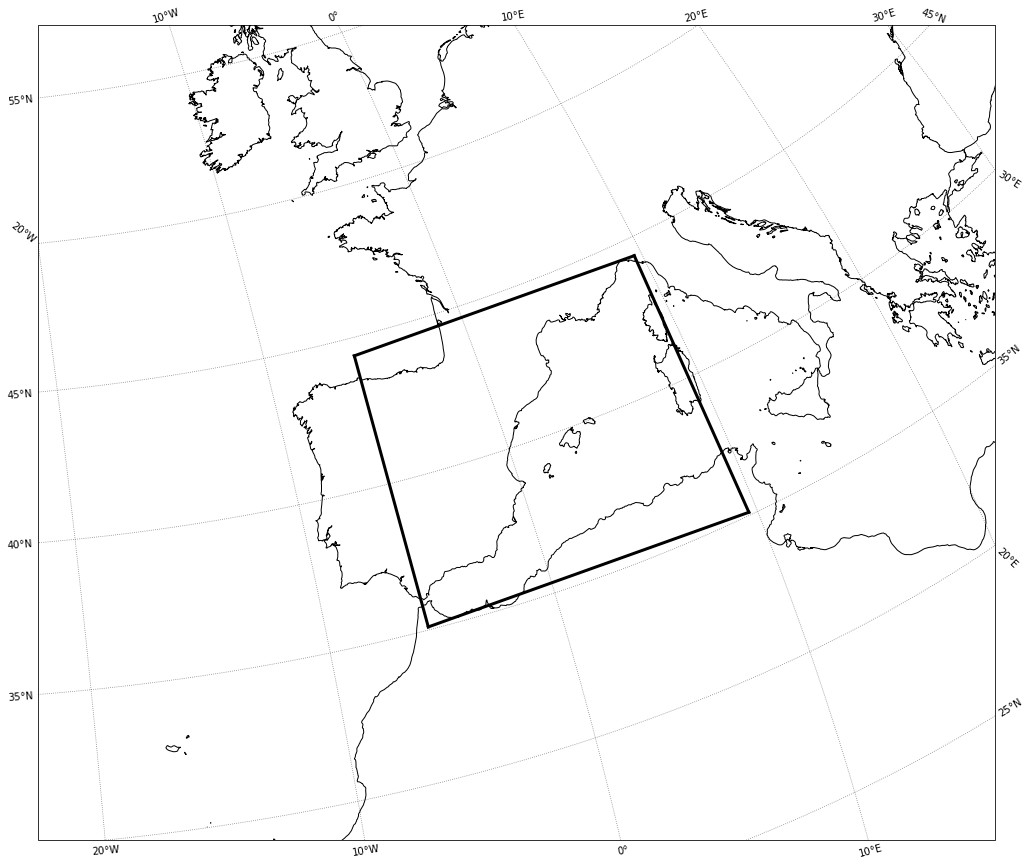

In [15]:
dir='/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/'

region='MEDWEST'
tdir=dir+region+'/'

fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                        central_latitude=35))
ax.set_extent((-20, 20, 30, 50))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

for k in np.arange(4):
    tdirf=tdir+phase[k]+'_phase/'+data[k]
    files=glob.glob(tdirf+'/*nc')
    print(tdirf)
    for f in np.arange(len(files)):
        ds=xr.open_dataset(files[f])
        if data == 'karin':
            lat = ds['latitude'];
            lon = ds['longitude'];
            plt.scatter(lon,lat, c=colors[k], linewidth=0, s=18,transform=ccrs.PlateCarree());
        if data == 'nadir':
            lat = ds['latitude'];
            lon = ds['longitude'];
            plt.scatter(lon,lat, c=colors[k], linewidth=0, s=18,transform=ccrs.PlateCarree());


In [16]:
k=0

In [17]:
    tdirf=tdir+phase[k]+'_phase/'+data[k]
    files=glob.glob(tdirf+'/*nc')
    print(tdirf)


/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/calval_phase/karin


In [18]:
len(files)

797

In [19]:
f=0

In [20]:
        ds=xr.open_dataset(files[f])


In [21]:
ds

<xarray.Dataset>
Dimensions:                (num_lines: 266, num_pixels: 71)
Coordinates:
    latitude               (num_lines, num_pixels) float64 ...
    longitude              (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time                   (num_lines) datetime64[ns] ...
    ssh_karin              (num_lines, num_pixels) float64 ...
    err_timing             (num_lines, num_pixels) float64 ...
    err_roll               (num_lines, num_pixels) float64 ...
    err_baseline_dilation  (num_lines, num_pixels) float64 ...
    err_phase              (num_lines, num_pixels) float64 ...
    err_karin              (num_lines, num_pixels) float64 ...
    ssh_karin_true         (num_lines, num_pixels) float64 ...
    err_wet_troposphere    (num_lines, num_pixels) float64 ...
Attributes:
    Conventions:                        CF-1.7
    title:                              Level 2 Low Rate Sea Surface Height D...
    institution:                        CNES/JPL
    source:                             Simulate product
    history:                            2020-07-23 08:32:34 : Creation
    platform:                           SWOT
    references:                         Gaultier, L., C. Ubelmann, and L.-L. ...
    reference_document:                 D-56407_SWOT_Product_Description_L2_L...
    contact:                            CNES aviso@altimetry.fr, JPL podaac@p...
    cycle_number:                       393
    pass_number:                        20
    time_coverage_start:                2010-07-25T03:53:23.695609Z
    time_coverage_end:                  2010-07-25T04:44:29.291290Z
    time_coverage_duration:             P51M5S
    time_coverage_resolution:           P1S
    geospatial_lon_min:                 6.154837968246848e-05
    geospatial_lon_max:                 359.99995720761115
    geospatial_lat_min:                 -78.29172038319075
    geospatial_lat_max:                 78.29190983692315
    left_first_longitude:               286.08170381431
    left_first_latitude:                77.03286122735166
    left_last_longitude:                93.22264009766208
    left_last_latitude:                 -78.29172038319075
    right_first_longitude:              286.0910410357011
    right_first_latitude:               78.29190983692315
    right_last_longitude:               93.21893087759418
    right_last_latitude:                -77.03267044576478
    wavelength:                         0.008385803020979
    orbit_solution:                     POE
    xref_input_l1b_lr_intf_file:        N/A
    xref_input_static_karin_cal_file:   N/A
    xref_input_static_geophys_files:    N/A
    xref_input_dynamic_geophys_files:   N/A
    xref_input_l1_nalt_gdr_files:       N/A
    xref_input_int_lr_xover_cal_files:  N/A
    xref_input_l2_rad_gdr_files:        N/A
    ellipsoid_semi_major_axis:          1.0
    ellipsoid_flattening:               0.0

In [22]:
            lat = ds['latitude'];
            lon = ds['longitude'];


In [24]:
lon

<xarray.DataArray 'longitude' (num_lines: 266, num_pixels: 71)>
array([[0.741144, 0.764318, 0.787495, ..., 2.323888, 2.347266, 2.370647],
       [0.746942, 0.77011 , 0.793282, ..., 2.329286, 2.352659, 2.376034],
       [0.752737, 0.775899, 0.799065, ..., 2.334682, 2.358048, 2.381417],
       ...,
       [2.146264, 2.168113, 2.189964, ..., 3.636973, 3.65897 , 3.680968],
       [2.151165, 2.173009, 2.194856, ..., 3.64155 , 3.663541, 3.685535],
       [2.156064, 2.177903, 2.199745, ..., 3.646124, 3.668111, 3.690099]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 41.15 41.16 41.16 ... 36.78 36.79
    longitude  (num_lines, num_pixels) float64 0.7411 0.7643 ... 3.668 3.69
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...

In [36]:
lonb=xr.where(lon>180,lon-360,lon)

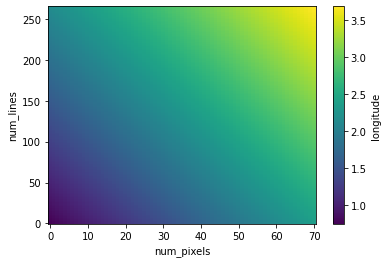

In [37]:
lonb.plot()

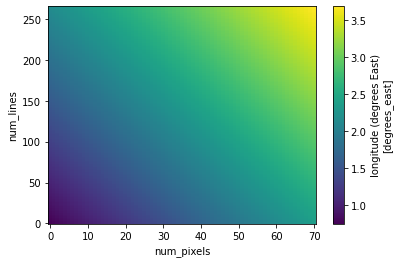

In [34]:
lon.plot()

In [33]:
print(lon)

<xarray.DataArray 'longitude' (num_lines: 266, num_pixels: 71)>
array([[0.741144, 0.764318, 0.787495, ..., 2.323888, 2.347266, 2.370647],
       [0.746942, 0.77011 , 0.793282, ..., 2.329286, 2.352659, 2.376034],
       [0.752737, 0.775899, 0.799065, ..., 2.334682, 2.358048, 2.381417],
       ...,
       [2.146264, 2.168113, 2.189964, ..., 3.636973, 3.65897 , 3.680968],
       [2.151165, 2.173009, 2.194856, ..., 3.64155 , 3.663541, 3.685535],
       [2.156064, 2.177903, 2.199745, ..., 3.646124, 3.668111, 3.690099]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 41.15 41.16 41.16 ... 36.78 36.79
    longitude  (num_lines, num_pixels) float64 0.7411 0.7643 ... 3.668 3.69
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...


In [28]:
lon[np.where(lon>180)]=lon-360

ValueError: shape mismatch: value array of shape (266,71) could not be broadcast to indexing result of shape (0,0)

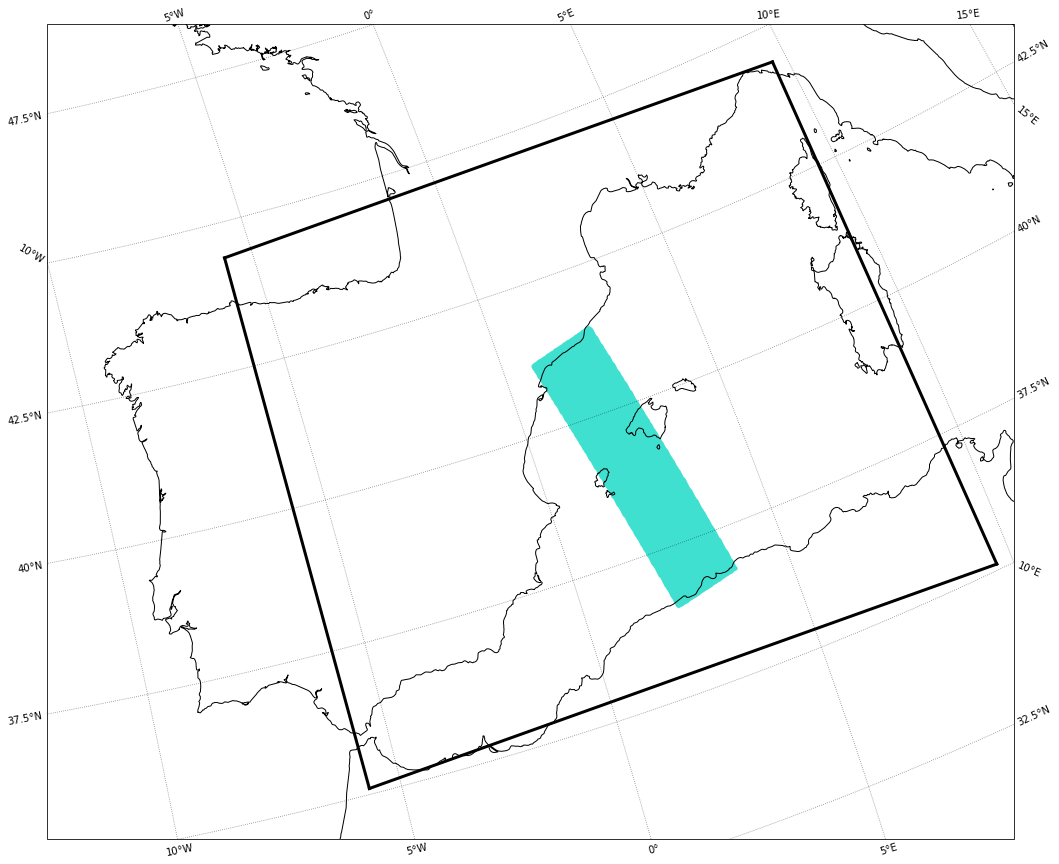

In [26]:
fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                        central_latitude=35))
ax.set_extent((-10, 10, 35, 45))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(lon,lat, c=colors[k], linewidth=0, s=18,transform=ccrs.PlateCarree());

In [ ]:
    for f in np.arange(len(files)):
        ds=xr.open_dataset(files[f])
        if data == 'karin':
            lat = ds['latitude'];
            lon = ds['longitude'];
            plt.scatter(lon,lat, c=colors[k], linewidth=0, s=18,transform=ccrs.PlateCarree());
        if data == 'nadir':
            lat = ds['latitude'];
            lon = ds['longitude'];
            plt.scatter(lon,lat, c=colors[k], linewidth=0, s=18,transform=ccrs.PlateCarree());


In [38]:
k=0

In [39]:
    tdirf=tdir+phase[k]+'_phase/'+data[k]
    files=glob.glob(tdirf+'/*nc')


In [41]:
ds=xr.open_mfdataset(files,concat_dim='num_lines',combine='nested')

In [42]:
lat=ds.latitude
lon=ds.longitude
lonb=xr.where(lon>180,lon-360,lon)

In [1]:
fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                        central_latitude=35))
ax.set_extent((-10, 10, 35, 45))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(lonb,lat, c=colors[k], label=phase[k]+' phase-'+data[k],linewidth=0, s=2,transform=ccrs.PlateCarree(), zorder=1);
ax.legend()

NameError: name 'plt' is not defined